<h2>U2 :: LÓGICA DIFUSA</h2>
<h3>Práctica 2 - Funciones de membresía</h3>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Librería 'fuzzy.py', para aplicaciones de lógica difusa.
# Autor: Claudio Morales Díaz  // INACAP Puente Alto. (Chile, 2020)
# 

import numpy as np
import matplotlib.pyplot as plt

<h4>Funciones de membresía singleton, triangular y trapezoidal</h4>
A continuación se presenta una posible implementación de las fuciones Singleton, Triangular y Trapezoidal

In [4]:
# Función singleton(x, x0): función de pertenencia singleton.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   x0: valor de referencia (int, float)
# Retorna:
#   singleton(x, x0): float, si x es int, float.
#   singleton(x, x0): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def singleton(x, x0):
    if (type(x) is int) or (type(x) is float):
    # Si X es entero o real evalua para el valor entrante.
        if x == x0:
            m = 1.0
        else:
            m = 0.0
        return m
    elif (type(x) is np.ndarray):
    # Si es un vector evalúa para todos sus elementos.
        m = np.zeros(x.size)
        for i in range(x.size):
            if x[i] == x0:
                m[i] = 1.0
            else:
                m[i] = 0.0
        return m
    else:
        return -1
    

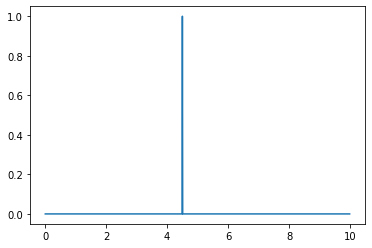


Ejemplo: Con x0 4.5 el valor singleton de x_test es 0.0


In [25]:
# Verificamos funcionamiento de la función para cierto universo de discurso
x = np.linspace(0, 10, 1000, endpoint=False)
x0 = 4.5
m = singleton(x, x0)
plt.plot(x,m)
plt.show()

In [34]:
# Verificamos funcionamiento de la función para un valor concreto
x_test = 6
print("\nEjemplo: Con x0", x0, "el valor singleton de x_test es", singleton(x_test, x0))


Ejemplo: Con x0 4.5 el valor singleton de x_test es 0.0


In [26]:
#
# Función trimf(x, param): función de pertenencia triangular.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, c]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trimf(x, param): float, si x es int, float.
#   trimf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trimf(x, param):
    # param = [a, b, c]
    # a <= b <= c
    # convertimos a flotantes para facilitar las operaciones de división siguientes
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    if (a <= b) and (b <= c):
        if (type(x) is int) or (type(x) is float):     
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = (c - x)/(c - b)  
            else:
                m = 0.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] <= a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] <= b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = (c - x[i])/(c - b)  
                else:
                    m[i] = 0.0
            return m
    else:
        return -1


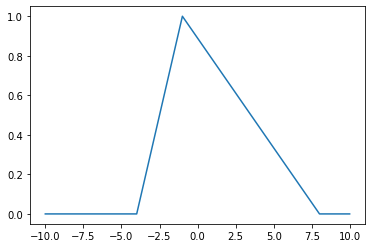

In [32]:
# Verificamos funcionamiento de la función para cierto universo de discurso
x = np.linspace(-10, 10, 1000, endpoint=False)
a, b, c = -4, -1, 8
m = trimf(x, [a, b, c])
plt.plot(x,m)

In [33]:
# Verificamos funcionamiento de la función para un valor concreto
x_test = 2.
print("\nEjemplo: Con x_test =", x_test, ", m(x) =", trimf(x_test,[a, b, c]))


Ejemplo: Con x_test = 2.0 , m(x) = 0.6666666666666666


In [35]:
#
# Función trapmf(x, [a, b, c, d]): función de pertenencia trapezoidal.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   [a, b, c, d]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c <= d
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trapmf(x, param): float, si x es int, float.
#   trapmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trapmf(x, param):
    # param = [a, b, c, d]
    # a <= b <= c <=d
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    d = float(param[3])
    if (a <= b) and (b <= c) and (c <= d):
        if (type(x) is int) or (type(x) is float):     
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = 1.0  
            elif (c <= x) and (x <= d):
                m = (d - x)/(d - c)  
            else:
                m = 0.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] <= a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] <= b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = 1.0
                elif (c <= x[i]) and (x[i] <= d):
                    m[i] = (d - x[i])/(d - c)  
                else:
                    m[i] = 0.0
            return m
    else:
        return -1


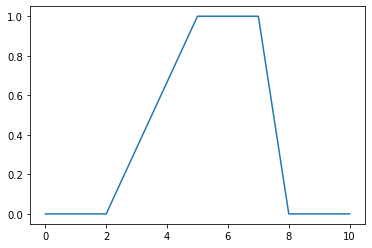

In [36]:
# Verificamos funcionamiento de la función para cierto universo de discurso
x = np.linspace(0, 10, 1001, endpoint=True)
a, b, c, d = 2, 5, 7, 8
m = trapmf(x, [a, b, c, d])
plt.plot(x,m)

In [38]:
# Verificamos funcionamiento de la función para un valor concreto
x_test = 7.5
print("\nEjemplo: Con x_test =", x_test, ", m(x) =", trapmf(x_test,[a, b, c, d]))


Ejemplo: Con x_test = 7.5 , m(x) = 0.5


<h3>EJERCICIO</h3>
<h4>Construcción de funciones de membresía</h4>
<ol>
<li>Tomando como ejemplo las funciones singleton, trimf y trapmf, codifica las funciones <b>gaussmf, gbellmf y sigmf</b>
<li>Verifica el funcionamiento de las funciones representando gráficamente a partir de los códigos de prueba que se proponen.
</ol>

In [ ]:
#
# Función gaussmf(x, param): función de pertenencia gaussiana.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [sig, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse sig > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gaussmf(x, param): float, si x es int, float.
#   gaussmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#

def gaussmf(x, param):
    # param = [sig, x0]
    # sig > 0
    sig = param[0]
    x0 = param[1]
    if (sig > 0):
        # Escribe aquí el código
        pass
    else:
        return -1


In [ ]:
# Verificamos el funcionamiento de la función para el caso general (elementos del universo de discurso)
x = np.linspace(0, 10, 1001, endpoint=True)
sig, x0 = 1, 5
m = gaussmf(x, [sig, x0])
plt.plot(x,m)

In [ ]:
# Verificamos funcionamiento de la función para un valor concreto
x_test = 6
print("Ejemplo: Con x_test =", x_test, ", m(x) =", gaussmf(x_test,[sig, x0]))

In [ ]:
#
# Función gbellmf(x, param): función de pertenencia campana generalizada.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a, b > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gbellmf(x, param): float, si x es int, float.
#   gbellmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gbellmf(x, param):
    # param = [a, b, x0]
    # a, b > 0
    a = param[0]
    b = param[1]
    x0 = param[2]
    if (a > 0) and (b > 0):
        # Escribe aquí el código
        pass
    else:
        return -1


In [ ]:
# Verificamos el funcionamiento de la función para el caso general (elementos del universo de discurso)
x = np.linspace(0, 10, 1001)
a, b, x0 = 3, 4, 5
m = gbellmf(x, [a, b, x0])
plt.plot(x,m)

In [ ]:
# Verificamos funcionamiento de la función para un valor concreto
x_test = 6
print("\nEjemplo: Con x_test =", x_test, ", m(x) =", gbellmf(x_test,[a, b, x0]))

In [ ]:
#
# Función sigmf(): función de pertenencia sigmoidal.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   sigmf(x, param): float, si x es int, float.
#   sigmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def sigmf(x, param):
    # param = [a, x0]
    a = param[0]
    x0 = param[1]
    
    # Escribe aquí el código


In [ ]:
# Verificamos el funcionamiento de la función para el caso general (elementos del universo de discurso)
x = np.linspace(0, 10, 1001)
a, x0 = 1, 5
m = sigmf(x, [a, x0])
plt.plot(x,m)

In [ ]:
# Verificamos funcionamiento de la función para un valor concreto
x_test = 6
print("\nEjemplo: Con x_test =", xtest, ", m(x) =", sigmf(xtest,[a, x0]))